In [1]:
%matplotlib inline

   h          max error   
1.000000    1.585290e-01
0.500000    4.114892e-02
0.250000    1.038416e-02
0.125000    2.602133e-03
0.062500    6.509145e-04
0.031250    1.627525e-04
0.015625    4.068961e-05

Tolerance is OK. Good value of h=  0.015625


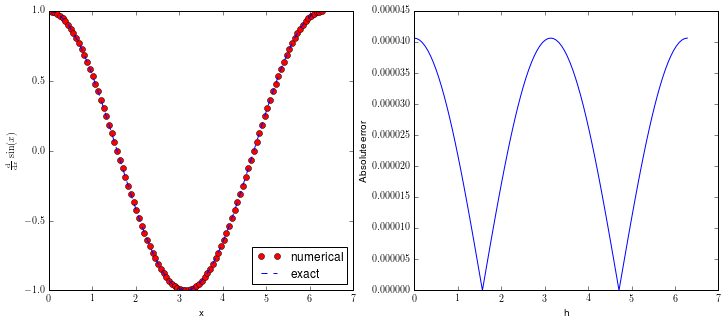

In [3]:
# %load problem02_1.py
#!/usr/bin/env python3
"""
%**************************************************************************
%*  Example  2.2                                                          *
%*  filename: ch02pr02.py                                                 *
%*  program listing number: 2.2                                           *
%*                                                                        *
%*  This program evaluates the derivative of a given function func(x)     *
%*  at x=1 using the mean finite difference method with the accuracy      *
%*  specified by tolerance.                                               *
%*                                                                        *
%*     Programed by Ryoichi Kawai for Computational Physics Course.       *
%*     Last modification:  01/16/2017.                                    *
%**************************************************************************
"""
import numpy as np
import matplotlib.pyplot as plt

# Set the tolerance
tol=0.0001   

# Set the number of points to evaluate the derivative
N=101
# Find the grid size
dx=2.0*np.pi/(N-1)
# Set the points where the derivative is evaluated.
x = np.linspace(0,N-1,N)*dx

h=2.0 # initial interval

# any value bigger than tol is OK here.
err = tol+1.0

print("{0:^8s}   {1:^15s}".format("h","max error"))

# Repeat until error is smaller than tolerance.
while err>tol:
    #set the interval
    h=h/2.0
    # Derivative by the mean finite difference method
    numerical=(np.sin(x+h)-np.sin(x-h))/(2.0*h)
    # Exact value
    exact=np.cos(x)
    # Largest absolute error
    err=np.max(np.abs(numerical-exact))
    # Show the results.
    print("{0:8.6f} {1:15.6e}".format(h,err))

print("\nTolerance is OK. Good value of h={:10.6f}".format(h))

#Plot the results.
plt.ioff()
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics}')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x,numerical, 'or', label='numerical')
plt.plot(x,exact, '--b', label='exact')
plt.legend(loc=4)
plt.xlabel("x")
plt.ylabel("$\dv{x} \sin(x)$")
    
plt.subplot(1,2,2)
plt.plot(x,np.abs(numerical-exact), '-b')
plt.xlabel('h')
plt.ylabel('Absolute error')
plt.show()